/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,14,18,20,22,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-6-c6c57635685b>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  coloumn_names = df_fars.iloc[[30]].dropna(True)


[0 1 2 3 4 5 6 7]
Optimal C: 100


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


predictions: [1 1 1 ... 4 1 1]
groundTruth: 37594    1
70034    5
6432     5
33622    4
48584    4
        ..
75040    1
44669    6
82782    6
57126    1
34424    1
Name: CLASS, Length: 28834, dtype: int64
logistic regression classifier accuracy: 0.6664007768606506
[[    0     0     0     0     1     0     0     0]
 [    0 10418   386     0   744   330    88    26]
 [    0   827  1712     0    19  1661    26    11]
 [    0    20    25     0     4    42     1     5]
 [    0   670     2     0  5065    15     4    44]
 [    0   677  1221     0   188  1832    74     5]
 [    0   335   460     0   739   834    65     1]
 [    0    47     2     0    79     3     3   123]]


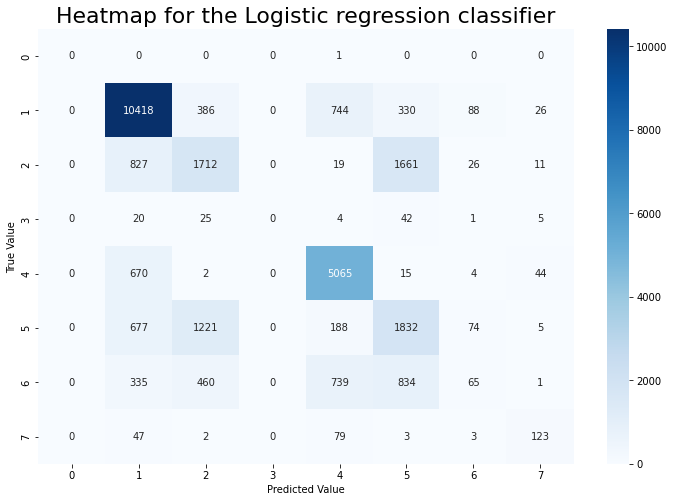

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

df_fars = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/fars.csv')
coloumn_names = df_fars.iloc[[30]].dropna(True)
df_fars = df_fars.drop(df_fars.index[0:33])
coloumn_names = ['Case State', 'Age', 'Sex', 'Person_Type', 'Seating_Position', 'Restraint_system_used',
                 'Air_Bag_availability/Deployment', 'Ejection', 'Ejection_Path', 'Extrication', 'Non_motorist_location',
                 'Police_reported_alcohol_involvment', 'Method_alcohol_determination', 'Alcohol_test_type',
                 'Alcohol_test_results', 'Police_reported_drug_involvment', 'Method_of_drug_determination',
                 'Drug_test_type', 'Drug_test_results_(1_of_3_)', 'Drug_test_type_(2_of_3_)',
                 'Drug_test_results_(2_of_3_)', 'Drug_test_type_(3_of_3_)', 'Drug_test_results_(3_of_3_)',
                 'Hispanic_origin', 'Taken_to_hospital', ' RELATED_FACTOR_(1)-PERSON_LEVEL',
                 ' RELATED_FACTOR_(2)-PERSON_LEVEL',  ' RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE', 'CLASS']

df_fars = pd.DataFrame(data=df_fars.drop(df_fars.iloc[:, 30:], axis=1))
df_fars.columns = coloumn_names

le = preprocessing.LabelEncoder()
objList = df_fars.select_dtypes(include = "object").columns

for feat in coloumn_names:
    df_fars[feat] = le.fit_transform(df_fars[feat].astype(str))


x = df_fars.iloc[:, :29]
y = df_fars['CLASS']


scaler = MinMaxScaler()
scaler.fit(df_fars)
scaled = scaler.fit_transform(df_fars)
scaled_df_fars = pd.DataFrame(scaled, columns=df_fars.columns)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


# print('cross validation')
# # try to find the optimal hyper-parameter by cross-validation
# parameters = [{'C': [100, 200, 300, 400]}]
# print("# Tuning hyper-parameter")
# clf = GridSearchCV(LogisticRegression(), parameters, cv=5)
# clf.fit(X_train, y_train.values.ravel())


# print('best parameters:')
# print(clf.best_params_)
# print('-------------------------------------')
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))


print(np.unique(y_test))
optimal_C = 100
print('Optimal C:', optimal_C)

clf = LogisticRegression(C = optimal_C).fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
print('predictions:',y_pred)
print('groundTruth:', y_test)
# Evaluate accuracy
print('logistic regression classifier accuracy:', accuracy_score(y_test, y_pred))

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)



plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.title('Heatmap for the Logistic regression classifier', fontsize=22)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.savefig('confusion_logistic.png')
plt.show()
